# подключаем библиотеки

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# загружаем данные

In [436]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
test_ids = test_df["ID"]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [437]:
train_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


# проводим разведочный анализ данных (eda)

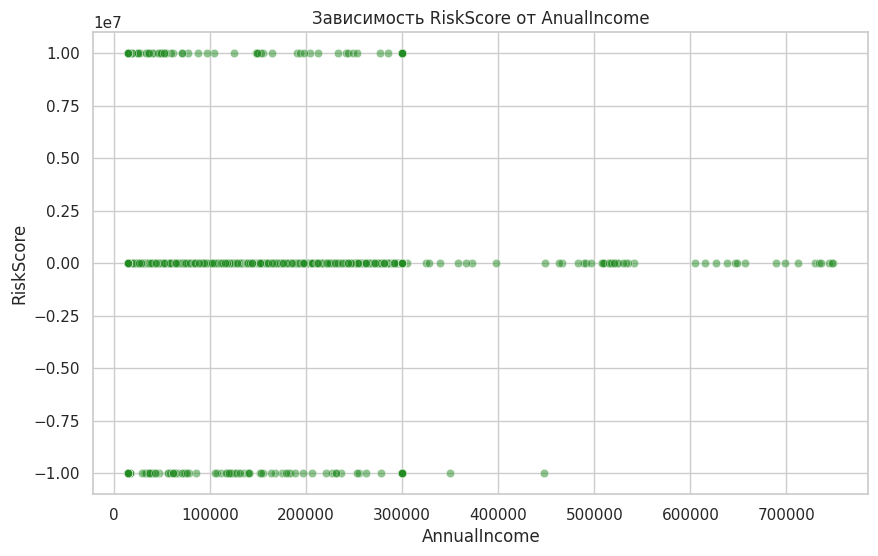

In [438]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='RiskScore', data=train_df, alpha=0.5, color='forestgreen')
plt.title('Зависимость RiskScore от AnualIncome')
plt.xlabel('AnnualIncome')
plt.ylabel('RiskScore')
plt.grid(True)
plt.show()

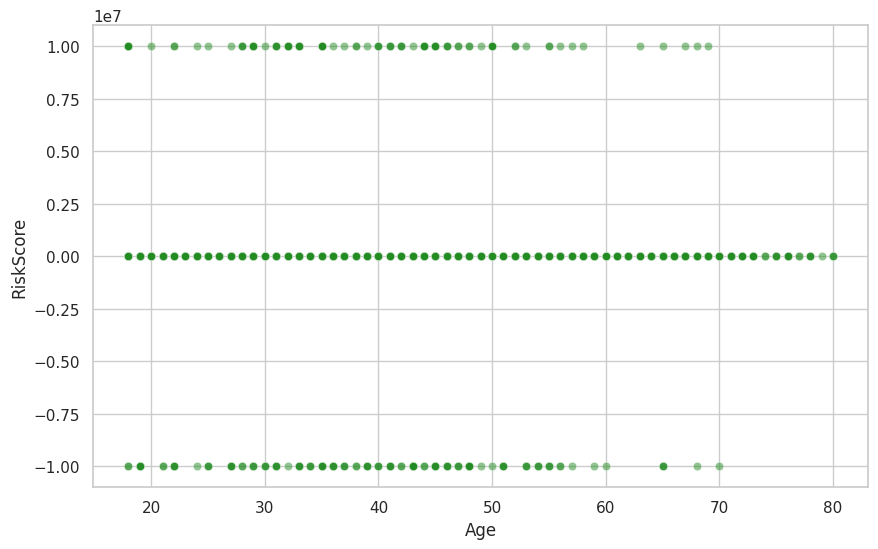

In [439]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='RiskScore', data=train_df, alpha=0.5, color='forestgreen')
plt.grid(True)
plt.show()

# 1. график целевой перменной

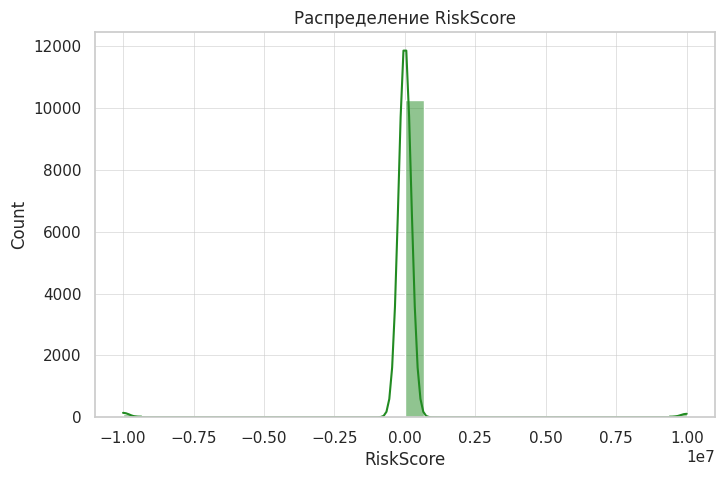

In [440]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['RiskScore'], bins=30, kde=True, color='forestgreen')
plt.title('Распределение RiskScore')
plt.grid(True, alpha=0.8, linewidth=0.5)
plt.minorticks_on()
plt.show()

# 2. матрица корреляций

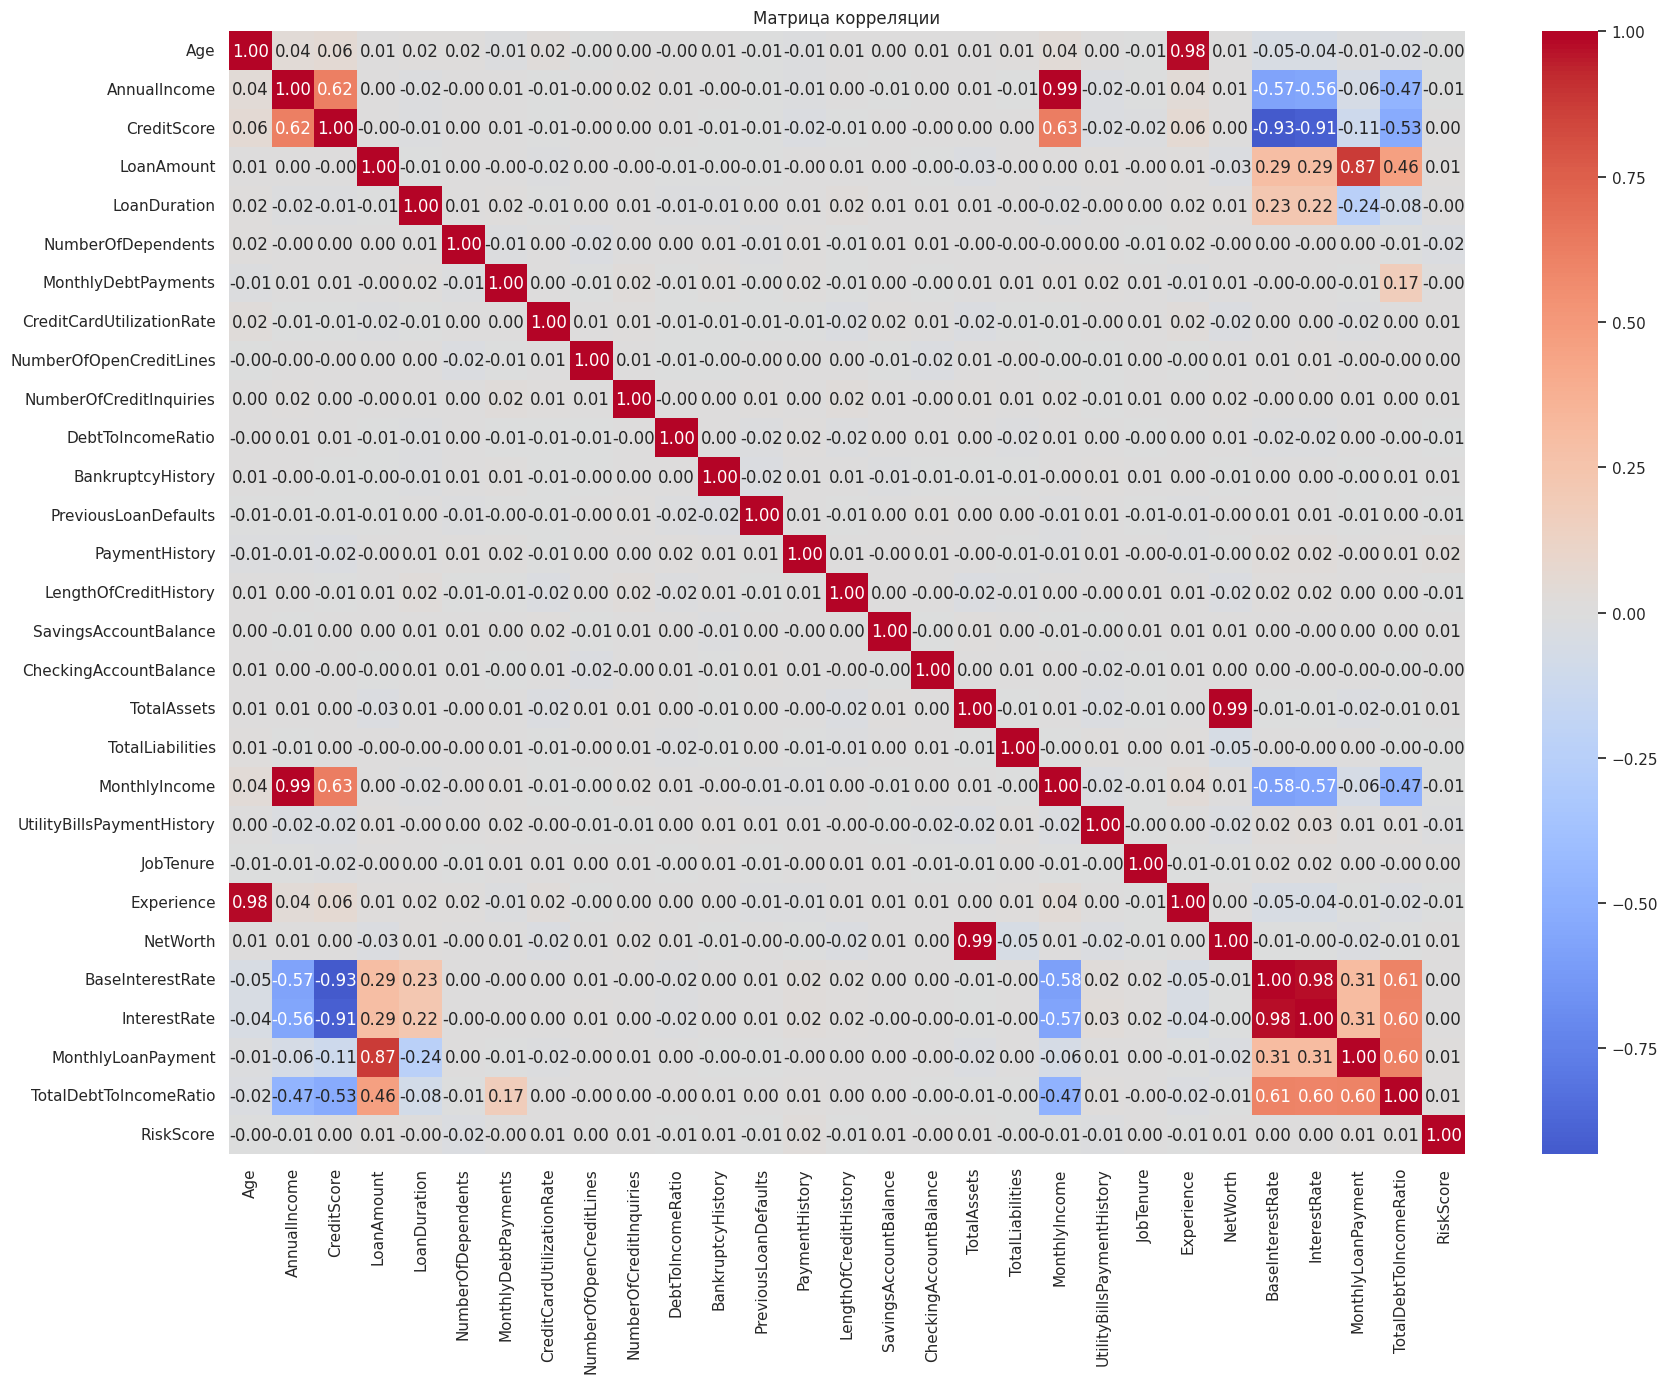

In [441]:
numeric_cols = train_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Матрица корреляции")
plt.tight_layout()
plt.show()

In [442]:
train_df['RiskScore'].describe()

,RiskScore
count,1.048700e+04
mean,-2.569878e+04
std,1.431675e+06
min,-9.999999e+06
25%,3.256475e+01
50%,4.411876e+01
75%,6.535690e+01
max,1.000000e+07


убираем самые крайние результаты

In [443]:
train_df = train_df[(train_df['RiskScore'] > -9.999999e+06) & (train_df['RiskScore'] < 1.000000e+07)]

и смотрим на данные заново

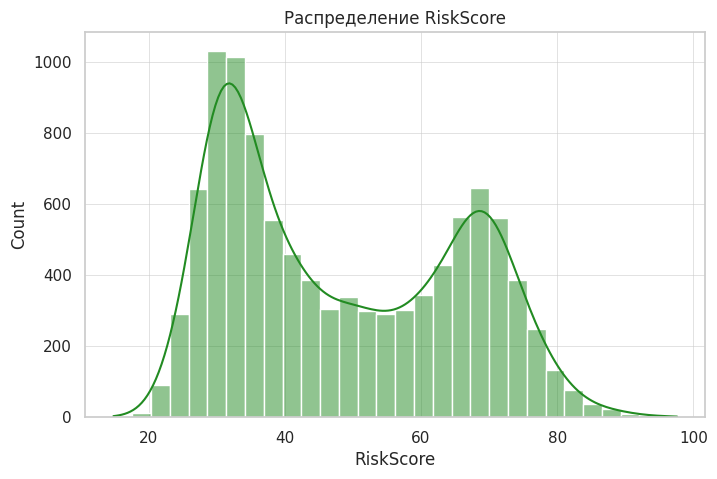

In [444]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['RiskScore'], bins=30, kde=True, color='forestgreen')
plt.title('Распределение RiskScore')
plt.grid(True, alpha=0.8, linewidth=0.5)
plt.minorticks_on()
plt.show()

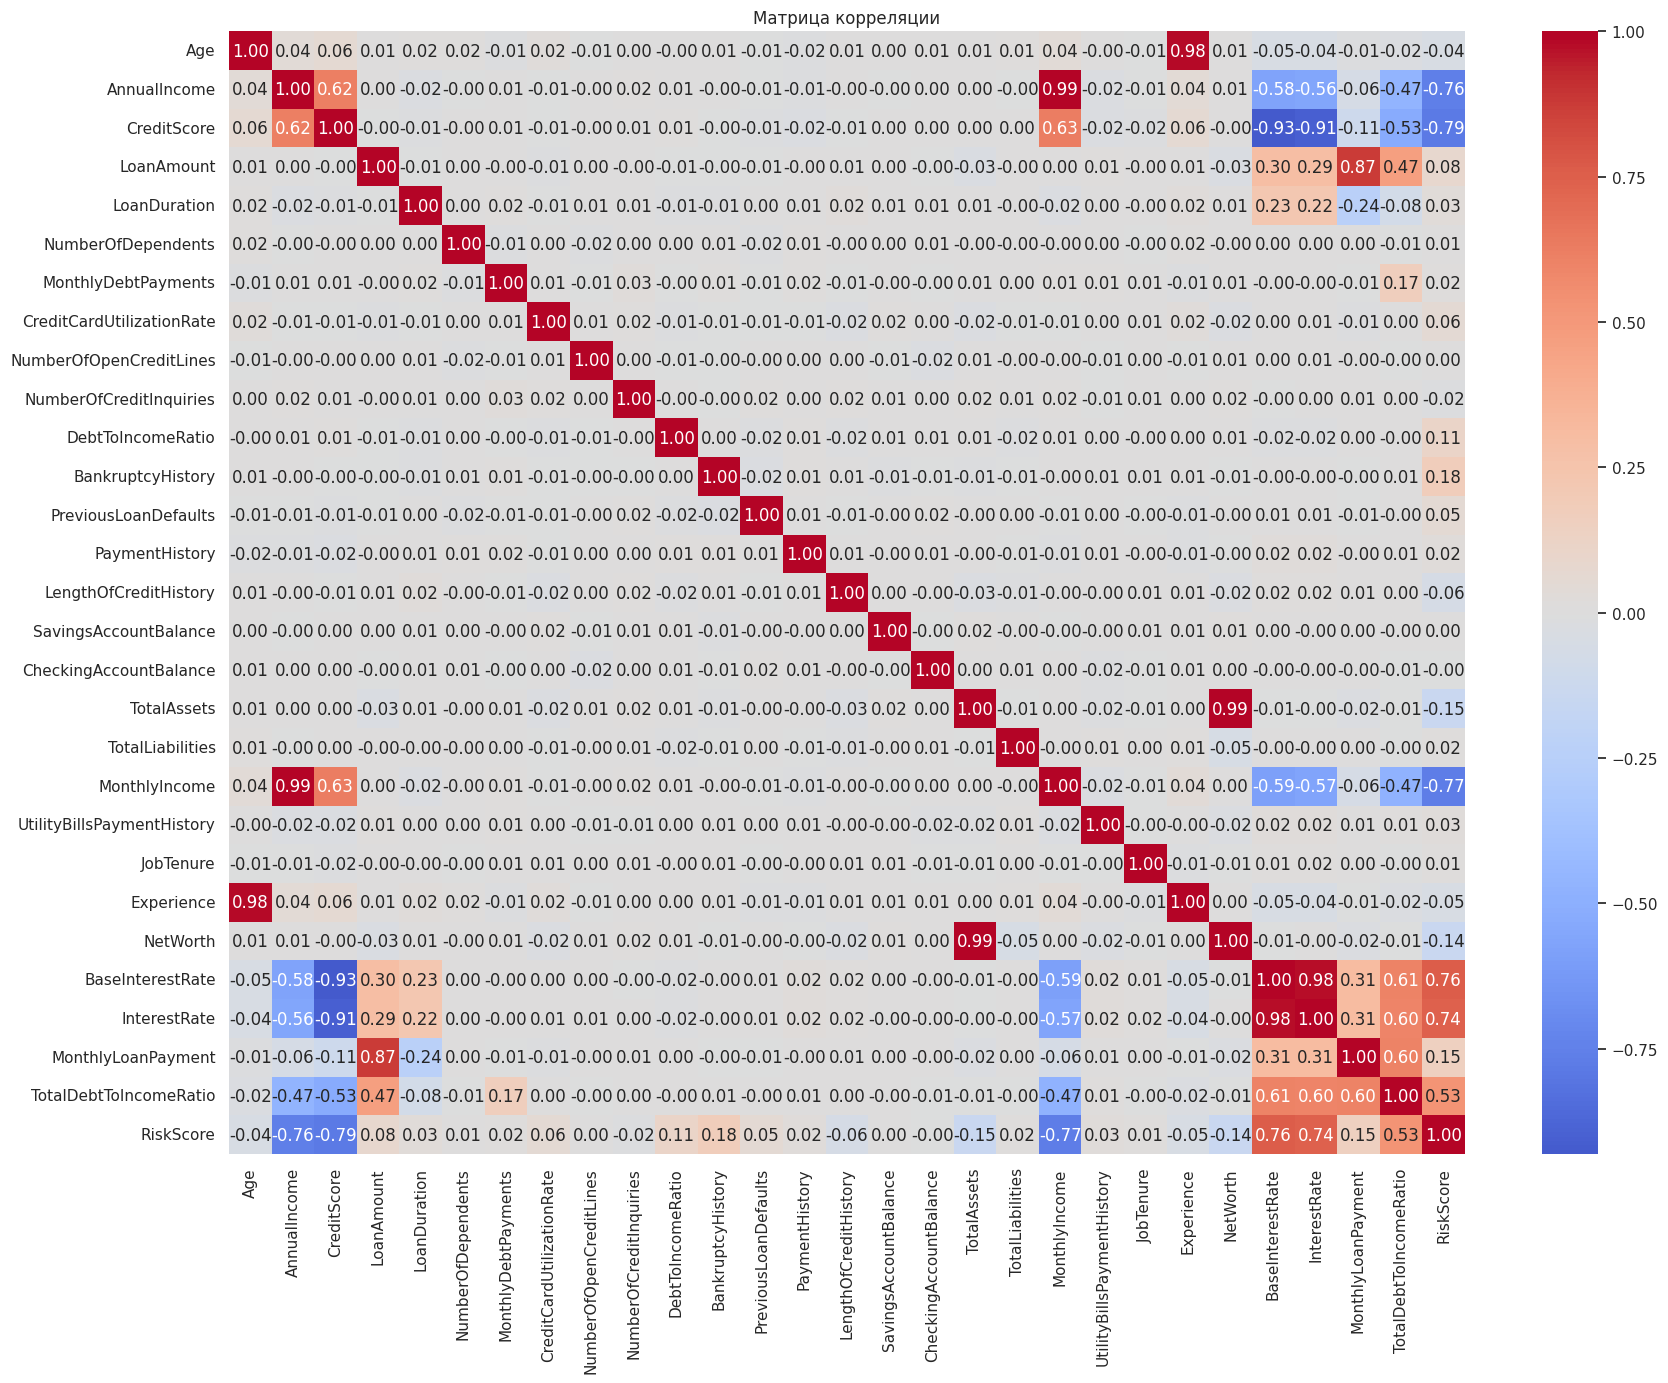

In [445]:
numeric_cols = train_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Матрица корреляции")
plt.tight_layout()
plt.show()

# смотрим на выбросы

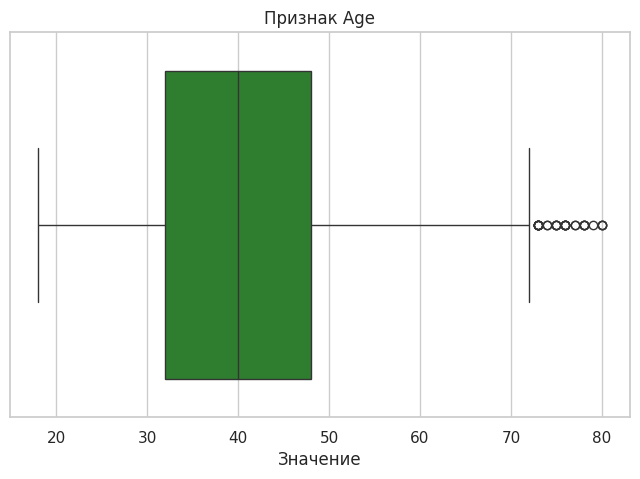

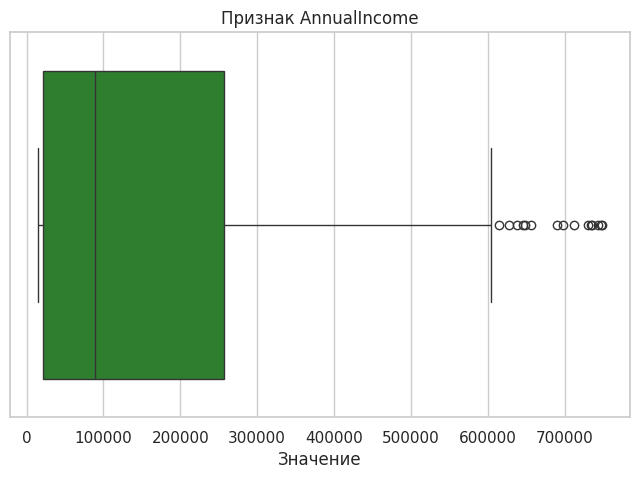

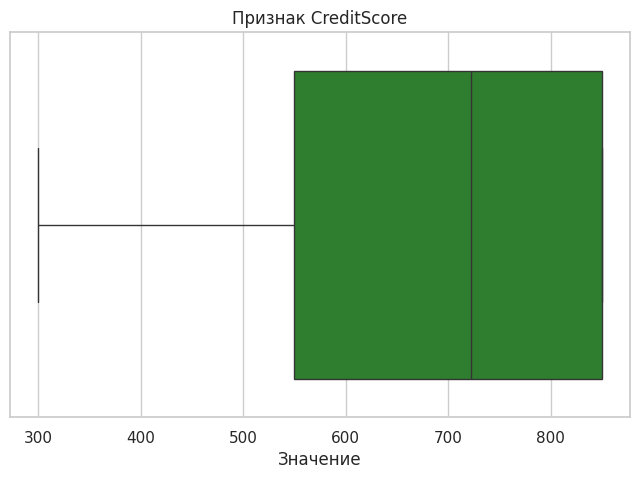

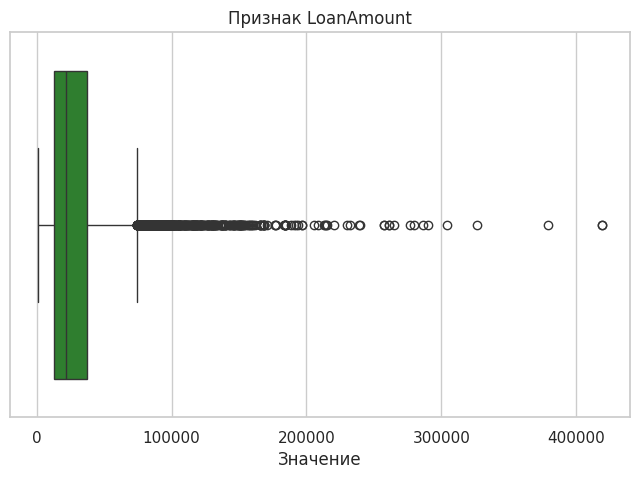

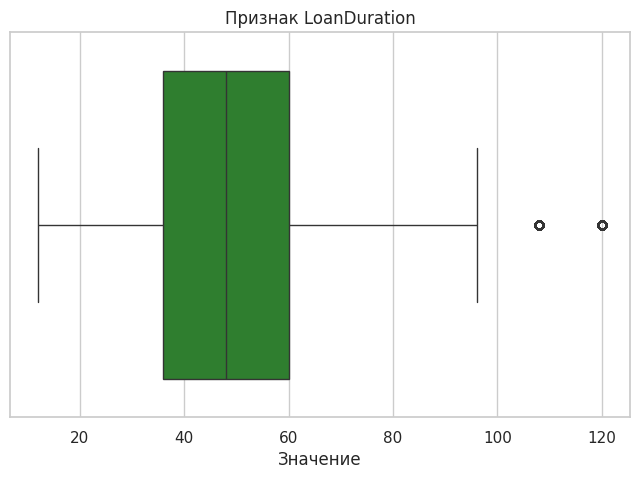

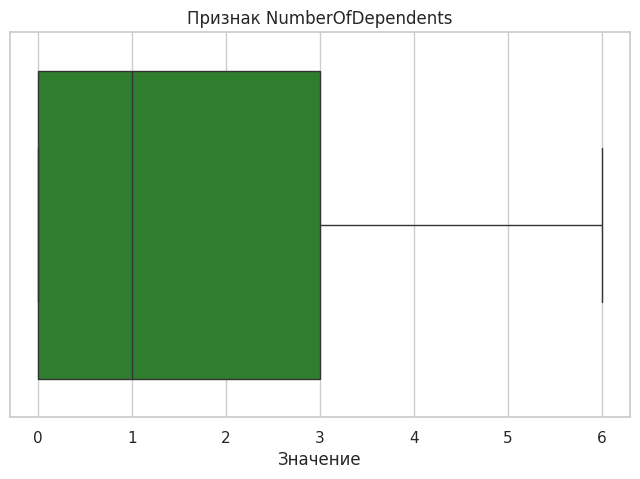

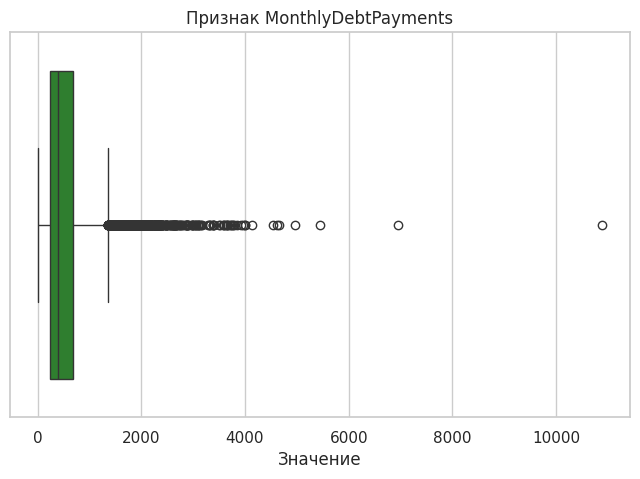

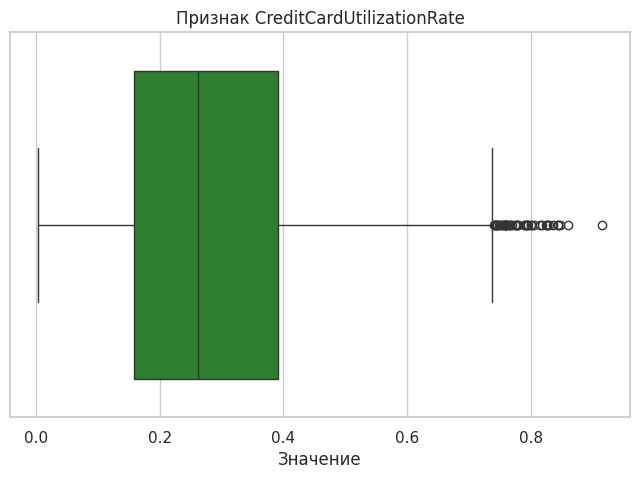

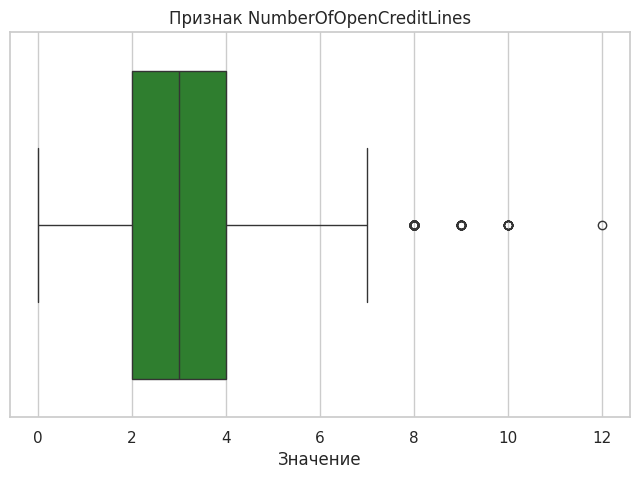

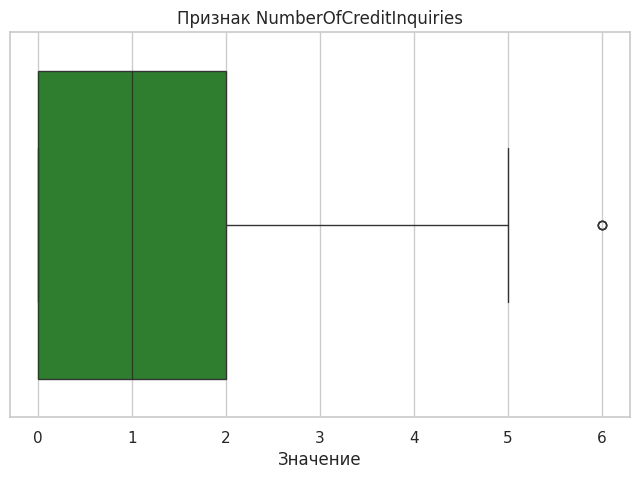

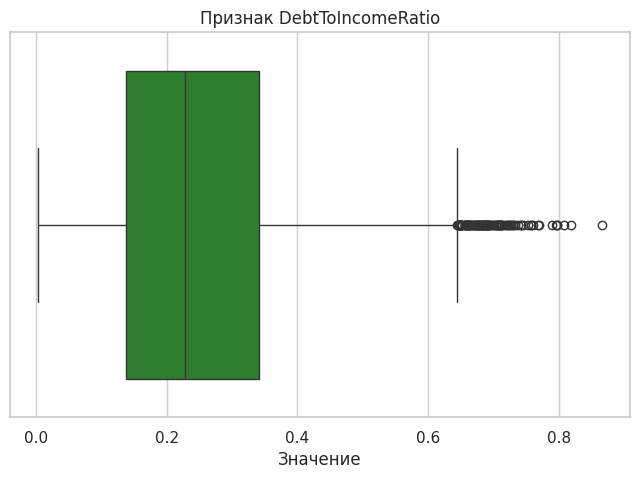

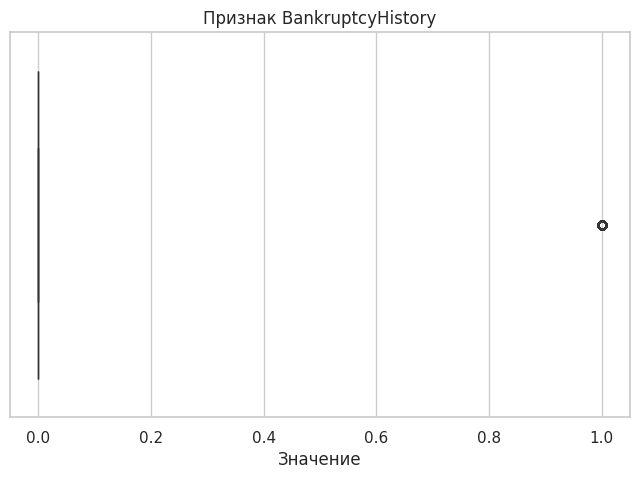

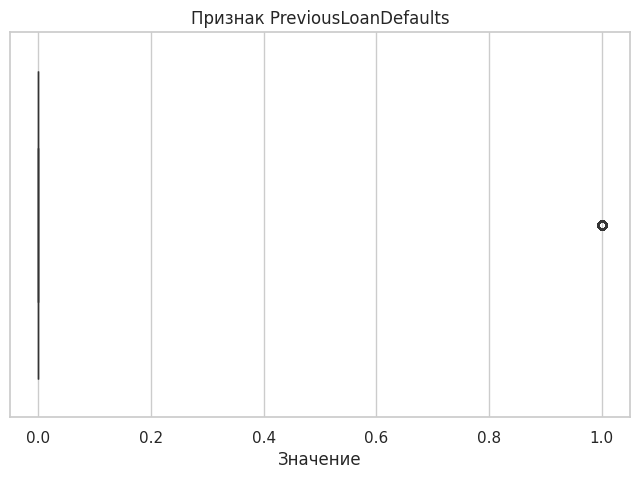

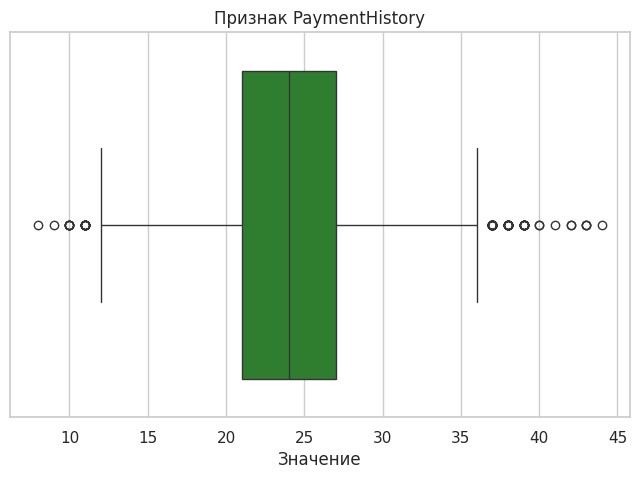

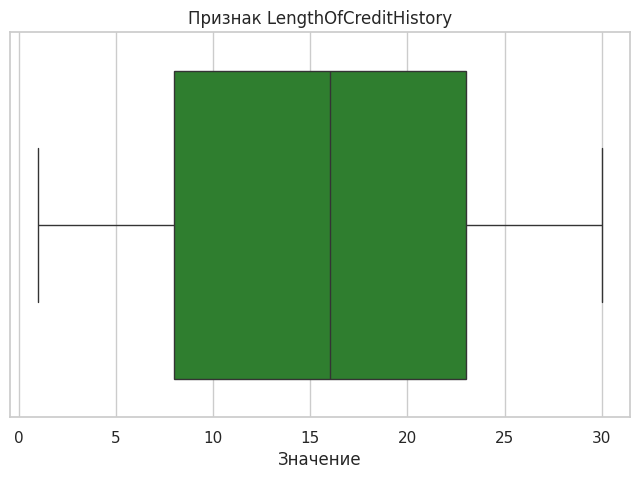

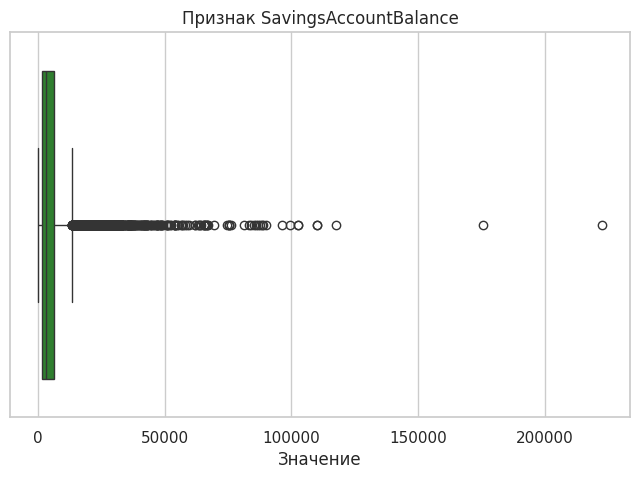

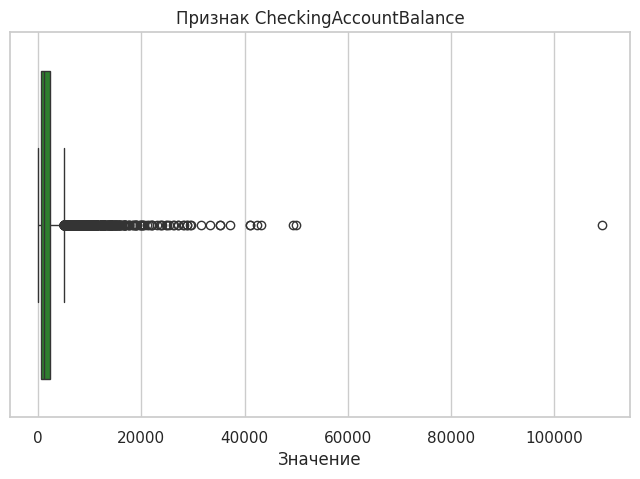

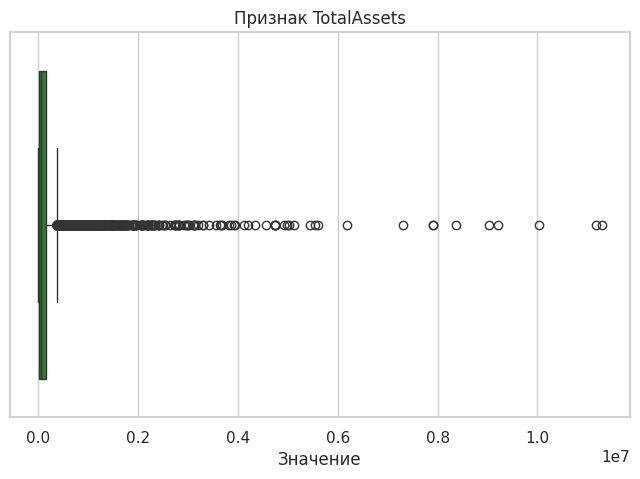

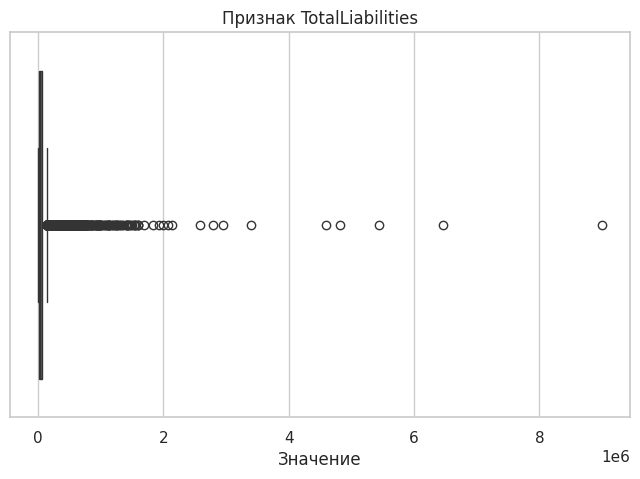

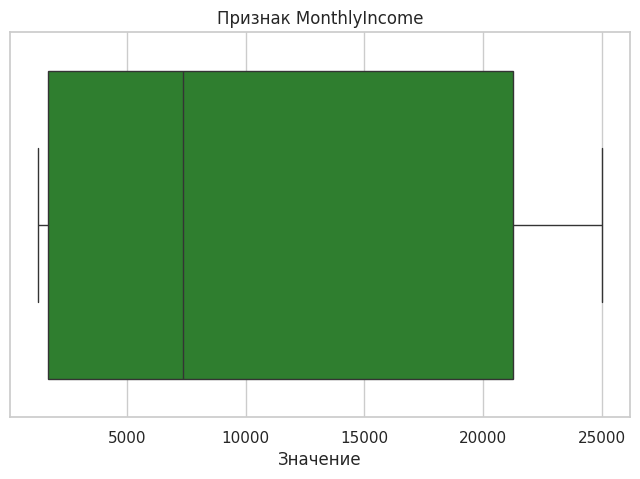

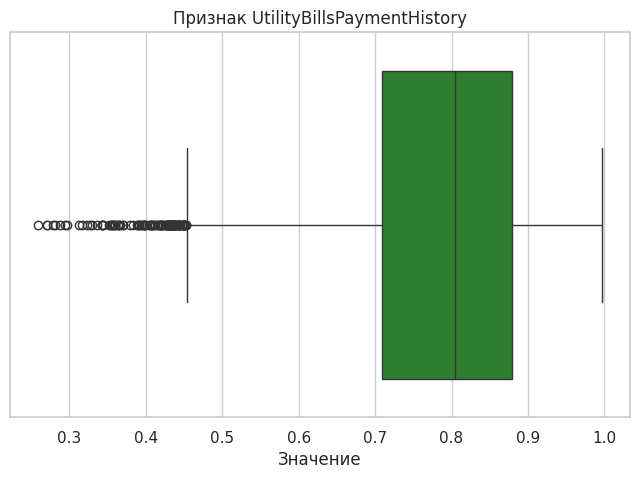

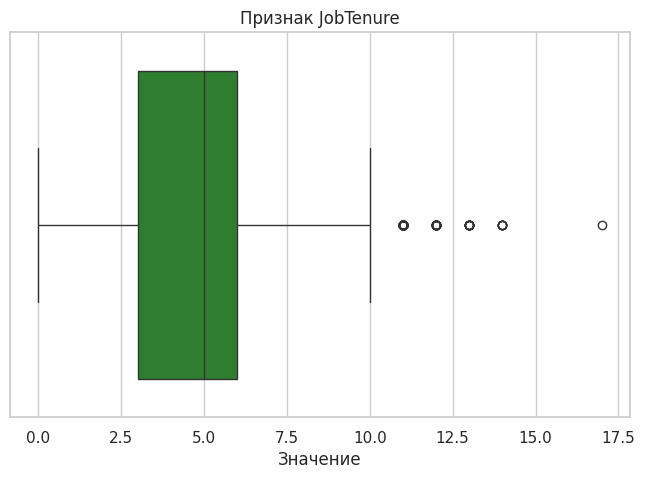

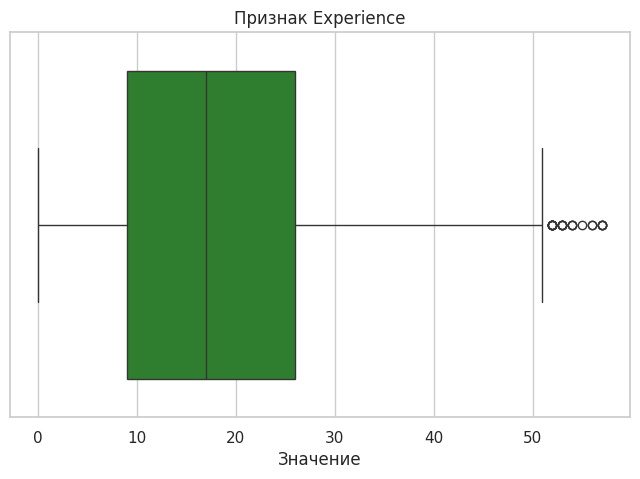

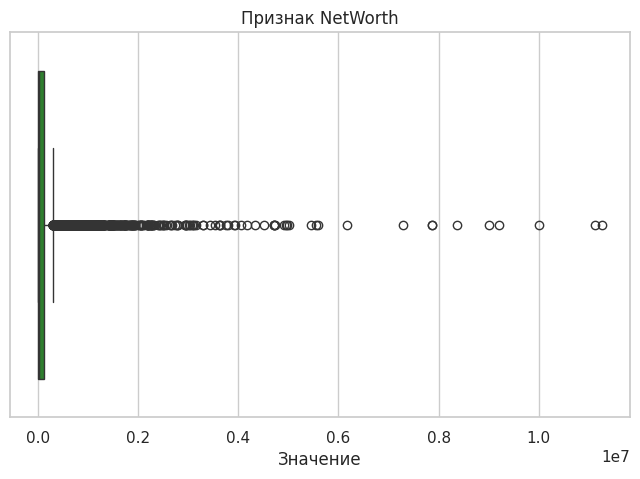

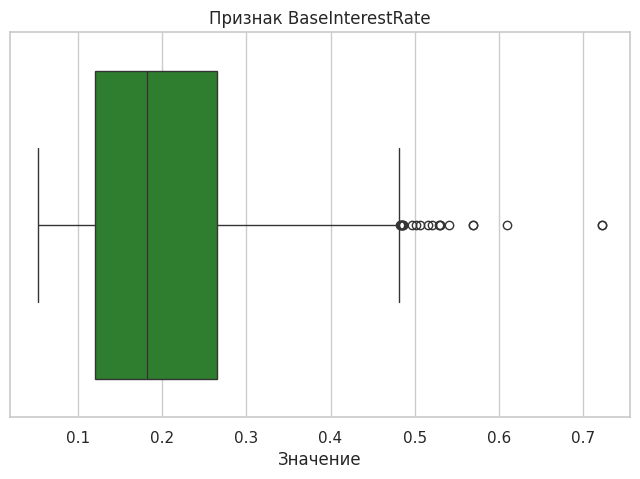

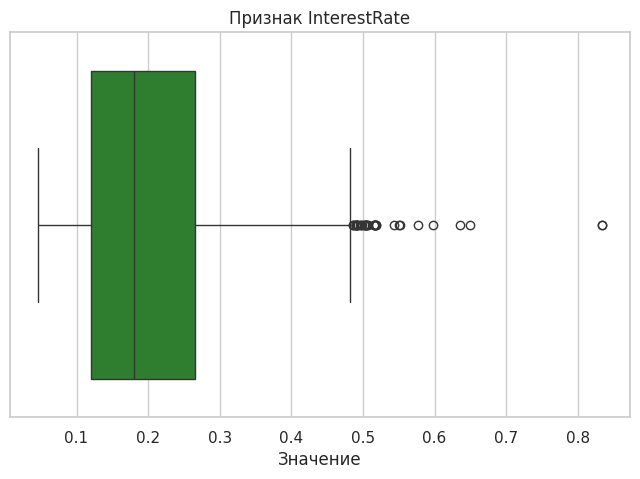

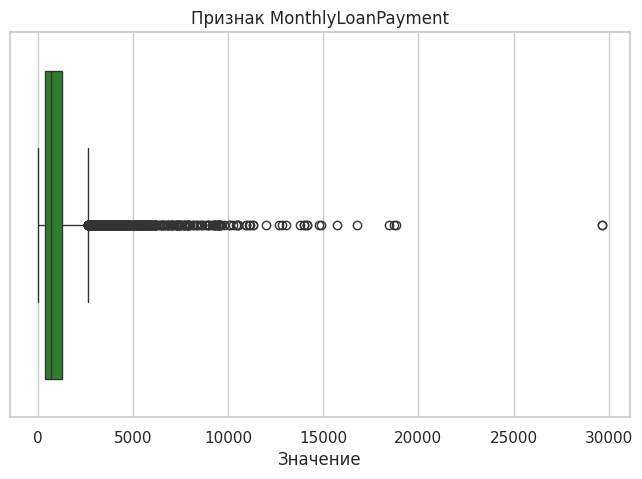

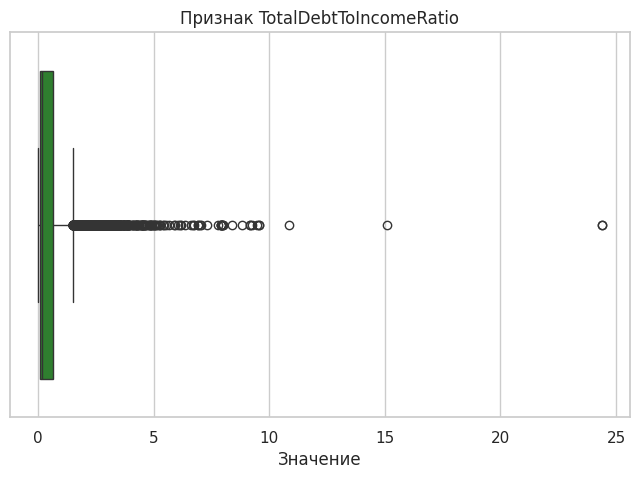

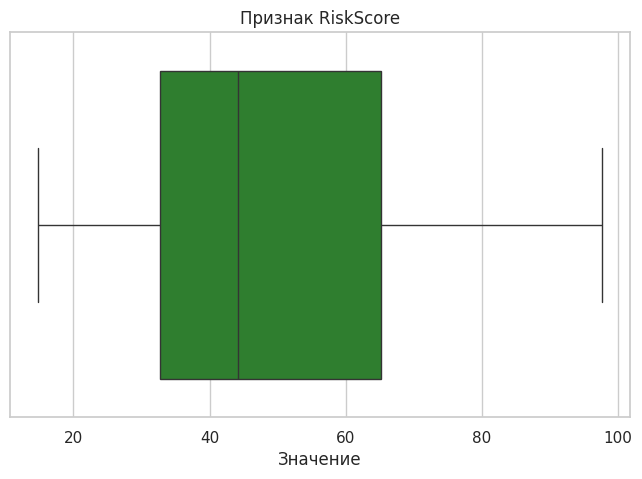

In [446]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
sns.set_theme(style="whitegrid")
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x=col, color='forestgreen')
    plt.title(f'Признак {col}')
    plt.xlabel('Значение')
    plt.show()

фильтруем выбросы

In [447]:
q1 = train_df['RiskScore'].quantile(0.25)
q3 = train_df['RiskScore'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

mask = train_df['RiskScore'].between(lower_bound, upper_bound)  # фильтрация

train_df = train_df[mask].copy()

y_train = train_df["RiskScore"].astype(float)  # целевая переменная
X_train = train_df.loc[mask].drop(columns=["RiskScore", "ID", "ApplicationDate"], errors="ignore")
X_test = test_df.drop(columns=["ID", "ApplicationDate"], errors="ignore")

nums = X_train.select_dtypes(include=np.number).columns.tolist()

# нормализация данных

In [448]:
# преобразует данные так, чтобы их распределение имело среднее 0 и стандартное отклонение 1
class ManualStandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    def transform(self, X):
        return (X - self.mean_) / (self.std_)
    def fit_transform(self, X):
        return self.fit(X).transform(X)

# преобразует данные к фиксированному диапазону
class ManualMinMaxScaler:
    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        return self
    def transform(self, X):
        return (X - self.min_) / (self.max_ - self.min_)
    def fit_transform(self, X):
        return self.fit(X).transform(X)

# кросс-валидация

In [449]:
def k_fold_cv(model, X, y, k=5, method='analytic', **kwargs):
    n_samples = len(X)
    fold_size = n_samples // k
    scores = []

    for fold in range(k):
        start_idx = fold * fold_size
        end_idx = start_idx + fold_size if fold < k - 1 else n_samples

        X_val = X[start_idx:end_idx]
        y_val = y[start_idx:end_idx]

        X_train = np.concatenate([X[:start_idx], X[end_idx:]])
        y_train = np.concatenate([y[:start_idx], y[end_idx:]])

        model_instance = model.__class__()
        if method == 'analytic':
            model_instance.fit_analytic(X_train, y_train)
        elif method == 'gradient':
            model_instance.fit_gradient(X_train, y_train, **kwargs)
        elif method == 'sgd':
            model_instance.fit_sgd(X_train, y_train, **kwargs)

        y_pred = model_instance.predict(X_val)
        mse = np.mean((y_val - y_pred) ** 2)
        scores.append(mse)

    return np.mean(scores), np.std(scores), scores


def leave_one_out_cv(model, X, y, method='analytic', max_samples=100, **kwargs):
    n_samples = min(len(X), max_samples)
    scores = []

    for i in range(n_samples):
        X_val = X[i:i+1]
        y_val = y[i:i+1]

        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)

        model_instance = model.__class__()
        if method == 'analytic':
            model_instance.fit_analytic(X_train, y_train)
        elif method == 'gradient':
            model_instance.fit_gradient(X_train, y_train, **kwargs)
        elif method == 'sgd':
            model_instance.fit_sgd(X_train, y_train, **kwargs)

        y_pred = model_instance.predict(X_val)
        mse = np.mean((y_val - y_pred) ** 2)
        scores.append(mse)

    return np.mean(scores), np.std(scores), scores

# mse, mae, r^2, mape

In [450]:
def manual_mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def manual_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def manual_r2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

def manual_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    eps = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100

тестируем

In [451]:
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 5.1])

mse_manual = manual_mse(y_true, y_pred)
mse_sklearn = mean_squared_error(y_true, y_pred)

print(f"MSE:")
print(f"Manual: {mse_manual:.6f}")
print(f"Sklearn: {mse_sklearn:.6f}")
print()

mae_manual = manual_mae(y_true, y_pred)
mae_sklearn = mean_absolute_error(y_true, y_pred)

print(f"MAE:")
print(f"Manual: {mae_manual:.6f}")
print(f"Sklearn: {mae_sklearn:.6f}")
print()

r2_manual = manual_r2(y_true, y_pred)
r2_sklearn = r2_score(y_true, y_pred)

print(f"R^2:")
print(f"Manual: {r2_manual:.6f}")
print(f"Sklearn: {r2_sklearn:.6f}")
print()

mape_manual = manual_mape(y_true, y_pred)
mape_sklearn = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"MAPE:")
print(f"Manual: {mape_manual:.6f}%")
print(f"Sklearn: {mape_sklearn:.6f}%")

MSE:
Manual: 0.022000
Sklearn: 0.022000

MAE:
Manual: 0.140000
Sklearn: 0.140000

R^2:
Manual: 0.989000
Sklearn: 0.989000

MAPE:
Manual: 5.733333%
Sklearn: 5.733333%


# линейная регрессия

In [452]:
class LinearRegression:
    def __init__(self, alpha=0.0, regularization='ridge', method='analytic'):
        self.weights = None
        self.bias = None
        self.alpha = alpha
        self.regularization = regularization  # 'ridge', 'lasso', или 'elasticnet'
        self.method = method
        self.l1_ratio = 0.5

    def fit_analytic(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.alpha > 0 and self.regularization == 'ridge':
            I = np.eye(X_b.shape[1])
            I[0, 0] = 0

            self.weights = np.linalg.inv(X_b.T @ X_b + self.alpha * I) @ X_b.T @ y

        elif self.alpha > 0 and self.regularization == 'lasso':
            return self.fit_gradient(X, y, learning_rate=0.01, n_iterations=1000)

        else:
            self.weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        self.bias = self.weights[0]
        self.weights = self.weights[1:]
        return self

    def fit_gradient(self, X, y, learning_rate=0.01, n_iterations=10000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(n_iterations):
            y_pred = X @ self.weights + self.bias

            dw = (2/n_samples) * X.T @ (y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)

            if self.alpha > 0:
                if self.regularization == 'ridge':
                    dw += self.alpha * 2 * self.weights

                elif self.regularization == 'lasso':
                    dw += self.alpha * np.sign(self.weights)

                elif self.regularization == 'elasticnet':
                    l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights)
                    l2_grad = self.alpha * (1 - self.l1_ratio) * 2 * self.weights
                    dw += l1_grad + l2_grad

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            if i % 100 == 0:
                mse = np.mean((y_pred - y) ** 2)
                print(f"Iteration {i}: MSE = {mse:.4f}")

        return self

    def fit_sgd(self, X, y, learning_rate=0.01, n_epochs=50):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(n_epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(n_samples):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]

                y_pred = xi @ self.weights + self.bias

                dw = 2 * xi.T @ (y_pred - yi)
                db = 2 * (y_pred - yi)

                if self.alpha > 0:
                    if self.regularization == 'ridge':
                        dw += self.alpha * 2 * self.weights
                    elif self.regularization == 'lasso':
                        dw += self.alpha * np.sign(self.weights)

                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

            if epoch % 10 == 0:
                y_pred_all = X @ self.weights + self.bias
                mse = np.mean((y_pred_all - y) ** 2)
                print(f"Epoch {epoch}: MSE = {mse:.4f}")

        return self

    def predict(self, X):
        X = np.array(X)
        return X @ self.weights + self.bias

    def fit(self, X, y):
        if self.method == 'analytic':
            return self.fit_analytic(X, y)
        elif self.method == 'gradient':
            return self.fit_gradient(X, y)
        elif self.method == 'sgd':
            return self.fit_sgd(X, y)

тестируем

In [453]:
X_test = np.array([[1], [2], [3]])
y_test = np.array([2, 4, 6])

model = LinearRegression()

model.fit_analytic(X_test, y_test)
pred_analytic = model.predict(X_test)
print(f"Аналитический: weights={model.weights[0]:.2f}, bias={model.bias:.2f}, pred={pred_analytic}")

model.fit_gradient(X_test, y_test, learning_rate=0.01, n_iterations=100)
pred_gradient = model.predict(X_test)
print(f"Градиентный: weights={model.weights[0]:.2f}, bias={model.bias:.2f}, pred={pred_gradient}")

from sklearn.linear_model import LinearRegression as SKLR
sk_model = SKLR()
sk_model.fit(X_test, y_test)
sk_pred = sk_model.predict(X_test)
print(f"Sklearn: coef={sk_model.coef_[0]:.2f}, intercept={sk_model.intercept_:.2f}, pred={sk_pred}")

Аналитический: weights=2.00, bias=-0.00, pred=[2. 4. 6.]
Iteration 0: MSE = 18.6667
Градиентный: weights=1.75, bias=0.58, pred=[2.32454145 4.06961834 5.81469523]
Sklearn: coef=2.00, intercept=0.00, pred=[2. 4. 6.]


In [454]:
train_df.shape

(10272, 35)

# заполняем пустые ячейки

In [455]:
print("Пустые ячейки:")
print(train_df.isnull().sum())

Пустые ячейки:
ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   485
LoanAmount                    485
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           485
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0

# обрабатываем данные

In [456]:
def prepare_data(df, target_col='RiskScore', test=False, fit_objects=None):
    df = df.copy()

    columns_to_drop = []
    if 'ID' in df.columns:
        columns_to_drop.append('ID')
    if 'ApplicationDate' in df.columns:
        columns_to_drop.append('ApplicationDate')

    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)  # удаляем служебные столбцы

    if not test:
        y = df[target_col]
        X = df.drop(columns=[target_col])
    else:
        y = None
        X = df

    if fit_objects is None:
        fit_objects = {
            'numeric_medians': {},
            'categorical_modes': {},
            'clip_bounds': {},
            'education_median': 2.0,
            'employment_median': 1.0
        }

    # 1. заполнение пропусков в числовых признаках
    numeric_cols = X.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        if X[col].isnull().sum() > 0:
            if not test:
                median_val = X[col].median()
                fit_objects['numeric_medians'][col] = median_val
            else:
                median_val = fit_objects['numeric_medians'].get(col, 0)

            X[col] = X[col].fillna(median_val)
        else:
            if not test:
                median_val = X[col].median()
                fit_objects['numeric_medians'][col] = median_val

    # 2. заполнение пропусков в категориальных признаках
    categorical_cols = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose",
                       "EmploymentStatus", "EducationLevel"]

    for col in categorical_cols:
        if col in X.columns:
            if X[col].isnull().sum() > 0:
                if not test:
                    mode_val = X[col].mode().iloc[0] if not X[col].mode().empty else 'Unknown'
                    fit_objects['categorical_modes'][col] = mode_val
                else:
                    mode_val = fit_objects['categorical_modes'].get(col, 'Unknown')

                X[col] = X[col].fillna(mode_val)
            else:
                if not test:
                    mode_val = X[col].mode().iloc[0] if not X[col].mode().empty else 'Unknown'
                    fit_objects['categorical_modes'][col] = mode_val

    # 3. обрезка выбросов (5-95 перцентили)
    for col in numeric_cols:
        if not test:
            lower_bound = X[col].quantile(0.05)
            upper_bound = X[col].quantile(0.95)
            fit_objects['clip_bounds'][col] = (lower_bound, upper_bound)
        else:
            bounds = fit_objects['clip_bounds'].get(col, (X[col].min(), X[col].max()))
            lower_bound, upper_bound = bounds

        X[col] = X[col].clip(lower_bound, upper_bound)

    # 4. кодирование EducationLevel и EmploymentStatus
    educ_map = {"Doctorate": 0, "Master": 1, "Bachelor": 2, "Associate": 3, "High School": 4}
    empl_map = {"Employed": 0, "Self-Employed": 1, "Unemployed": 2}

    if "EducationLevel" in X.columns:
        X["EducationLevel_num"] = X["EducationLevel"].map(educ_map).astype(float)
        education_median = np.median(list(educ_map.values()))
        X["EducationLevel_num"] = X["EducationLevel_num"].fillna(education_median)
        fit_objects['education_median'] = education_median

    if "EmploymentStatus" in X.columns:
        X["EmploymentStatus_num"] = X["EmploymentStatus"].map(empl_map).astype(float)
        employment_median = np.median(list(empl_map.values()))
        X["EmploymentStatus_num"] = X["EmploymentStatus_num"].fillna(employment_median)
        fit_objects['employment_median'] = employment_median

    if not test:
        return X, y, fit_objects
    else:
        return X, None, fit_objects

X_train, y_train, fit_objs = prepare_data(train_df)
X_test, _, _ = prepare_data(test_df, test=True, fit_objects=fit_objs)

In [457]:
X_train.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,EducationLevel_num,EmploymentStatus_num
0,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,3.0,0.0
1,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,4.0,0.0
2,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,2.0,0.0
3,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,4.0,0.0
4,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,2.0,0.0


In [458]:
print("Пустые ячейки:")
print(X_train.isnull().sum())

Пустые ячейки:
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate             

In [459]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10272 non-null  float64
 1   AnnualIncome                10272 non-null  float64
 2   CreditScore                 10272 non-null  float64
 3   LoanAmount                  10272 non-null  float64
 4   LoanDuration                10272 non-null  float64
 5   MaritalStatus               10272 non-null  object 
 6   NumberOfDependents          10272 non-null  float64
 7   HomeOwnershipStatus         10272 non-null  object 
 8   MonthlyDebtPayments         10272 non-null  float64
 9   CreditCardUtilizationRate   10272 non-null  float64
 10  NumberOfOpenCreditLines     10272 non-null  float64
 11  NumberOfCreditInquiries     10272 non-null  float64
 12  DebtToIncomeRatio           10272 non-null  float64
 13  BankruptcyHistory           10272 no

In [460]:
# feature engineering
def add_transformed_features(df):
    # корневые преобразования чтобы уменьшить влияние экстремальных значений
    df["CreditScore_sqrt2"] = df["CreditScore"] ** 0.5
    df["CreditScore_sqrt3"] = df["CreditScore"] ** (1/3)
    df["TotalDebtToIncomeRatio_sqrt2"] = df["TotalDebtToIncomeRatio"] ** 0.5
    df["TotalDebtToIncomeRatio_sqrt3"] = df["TotalDebtToIncomeRatio"] ** (1/3)

    # взаимодействия чтобы уловить совместное влияние признаков
    df["CreditScore_TotalDebtToIncomeRatio"] = df["CreditScore"] * df["TotalDebtToIncomeRatio"]
    df["Income_LoanAmount_Interaction"] = df["MonthlyIncome"] * df["LoanAmount"]
    df["Debt_Interest_Interaction"] = df["TotalDebtToIncomeRatio"] * df["InterestRate"]

    # комбинированная метрика
    df["CreditScore_DTI"] = df["CreditScore"] / df["TotalDebtToIncomeRatio"] + 1
    # нормализованное взаимодействие
    df["BaseInterestRate_MonthlyIncome"] = df["MonthlyIncome"] *  df["BaseInterestRate"]

    return df

X_train = add_transformed_features(X_train)
X_test = add_transformed_features(X_test)

log_features = ["MonthlyLoanPayment", "LoanAmount", "NetWorth", "TotalAssets",
                "CreditScore", "TotalDebtToIncomeRatio", "CreditScore_TotalDebtToIncomeRatio"]

# делает данные более нормальными и уменьшает влияние выбросов
def apply_log_transform(df, features):
    for feature in features:
        df[f"Log_{feature}"] = np.log1p(df[feature].clip(lower=0))  # log(x + 1)
    return df

X_train = apply_log_transform(X_train, log_features)
X_test = apply_log_transform(X_test, log_features)

bin_features = ["Age", "CreditScore", "LengthOfCreditHistory", "LoanAmount", "MonthlyIncome"]

# улавливает нелинейные зависимости, уменьшает влияние выбросов и преобразовывает непрерывные признаки в категориальные
def apply_binning(df, features):
    for feature in features:
        if feature in df.columns:
            df[f"{feature}_bin"] = pd.qcut(df[feature], q=8, labels=False,
                                          duplicates="drop").astype("category")
    return df

X_train = apply_binning(X_train, bin_features)
X_test = apply_binning(X_test, bin_features)

# квадратичные признаки
def add_squares(df):
    df = df.copy()
    if "CreditScore" in df.columns:
        df["CreditScore_sq"] = df["CreditScore"] ** 2
    if "Age" in df.columns:
        df["Age_sq"] = df["Age"] ** 2
    if "MonthlyIncome" in df.columns:
        df["MonthlyIncome_sq"] = df["MonthlyIncome"] ** 2
    return df

X_train = add_squares(X_train)
X_test = add_squares(X_test)

In [461]:
def add_polynomial_features(df_train, df_test, nums):
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    # не включать свободный член
    # только взаимодействия, без квадратов

    poly_train = poly.fit_transform(df_train[nums])
    poly_test = poly.transform(df_test[nums])

    poly_df_train = pd.DataFrame(
        poly_train,
        columns=poly.get_feature_names_out(nums),  # автоматические имена
        index=df_train.index  # сохраняем индексы
    )

    poly_df_test = pd.DataFrame(
        poly_test,
        columns=poly.get_feature_names_out(nums),
        index=df_test.index
    )

    cat_features = df_train.select_dtypes(exclude=np.number).columns.tolist()
    # числовые признаки, не вошедшие в полиномиальные
    other_numeric = [col for col in df_train.columns if col not in nums and col not in cat_features]

    result_train = pd.concat([
        df_train[cat_features],  # категориальные признаки без изменений
        poly_df_train,  # полиномиальные признаки
        df_train[other_numeric]  # остальные числовые без изменений
    ], axis=1)

    result_test = pd.concat([
        df_test[cat_features],
        poly_df_test,
        df_test[other_numeric]
    ], axis=1)

    return result_train, result_test

X_train, X_test = add_polynomial_features(X_train, X_test, nums)

In [462]:
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
for c in cat_cols:
    X_train[c] = X_train[c].astype("category")
    X_test[c] = X_test[c].astype("category")

for c in cat_cols:
    # находим редкие категории
    vc = X_train[c].value_counts(normalize=True)
    rare = vc[vc < 0.01].index
    if len(rare) > 0:
        if "Other" not in X_train[c].cat.categories:
            X_train[c] = X_train[c].cat.add_categories("Other")
            X_test[c] = X_test[c].cat.add_categories("Other")
        X_train[c] = X_train[c].replace(rare, "Other")
        X_test[c] = X_test[c].replace(rare, "Other")

In [463]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:  # если есть категориальные признаки
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    ohe.fit(X_train[cat_cols])

    train_encoded = ohe.transform(X_train[cat_cols])
    test_encoded = ohe.transform(X_test[cat_cols])

    encoded_cols = ohe.get_feature_names_out(cat_cols)
    train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=X_train.index)
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=X_test.index)

    num_cols = [col for col in X_train.columns if col not in cat_cols]

    X_train = pd.concat([X_train[num_cols], train_encoded_df], axis=1)
    X_test = pd.concat([X_test[num_cols], test_encoded_df], axis=1)

X_train = X_train.fillna(0).astype(float)
X_test = X_test.fillna(0).astype(float)

In [464]:
X_train.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanAmount_bin_3,LoanAmount_bin_4,LoanAmount_bin_5,LoanAmount_bin_6,LoanAmount_bin_7,MonthlyIncome_bin_1,MonthlyIncome_bin_2,MonthlyIncome_bin_3,MonthlyIncome_bin_4,MonthlyIncome_bin_5
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [471]:
def train_and_predict_with_scaling(X_train, y_train, X_test, test_ids, scaler_type='zscore'):
    if scaler_type == 'zscore':
        scaler = ManualStandardScaler()
    elif scaler_type == 'minmax':
        scaler = ManualMinMaxScaler()
    else:
        raise ValueError("scaler_type должен быть 'zscore' или 'minmax'")

    X_train_scaled = scaler.fit_transform(X_train.values)
    X_test_scaled = scaler.transform(X_test.values)

    model = LinearRegression(alpha=0.002, regularization='elasticnet', method='gradient')
    model.fit(X_train_scaled, y_train.values)

    # предсказания и метрики на train
    y_pred_train = model.predict(X_train_scaled)
    print("Train MSE:", manual_mse(y_train, y_pred_train))
    print("Train MAE:", manual_mae(y_train, y_pred_train))
    print("Train R2:", manual_r2(y_train, y_pred_train))
    print("Train MAPE:", manual_mape(y_train, y_pred_train))

    mse_train = manual_mse(y_train.values, y_pred_train)
    y_pred_test = model.predict(X_test_scaled)

    # создание CSV
    results_df = pd.DataFrame({
        'ID': test_ids,
        'RiskScore': y_pred_test
    })

    return model, mse_train, results_df, scaler

model_z, mse_z, predictions_z, scaler_z = train_and_predict_with_scaling(
    X_train, y_train, X_test, test_df.index, scaler_type='zscore'
)

predictions_z.to_csv('predictions.csv', index=False)

Iteration 0: MSE = 2635.7442
Iteration 100: MSE = 70.0494
Iteration 200: MSE = 28.1026
Iteration 300: MSE = 26.6971
Iteration 400: MSE = 26.2788
Iteration 500: MSE = 26.0118
Iteration 600: MSE = 25.8225
Iteration 700: MSE = 25.6803
Iteration 800: MSE = 25.5687
Iteration 900: MSE = 25.4781
Iteration 1000: MSE = 25.4025
Iteration 1100: MSE = 25.3381
Iteration 1200: MSE = 25.2822
Iteration 1300: MSE = 25.2329
Iteration 1400: MSE = 25.1890
Iteration 1500: MSE = 25.1495
Iteration 1600: MSE = 25.1137
Iteration 1700: MSE = 25.0809
Iteration 1800: MSE = 25.0507
Iteration 1900: MSE = 25.0228
Iteration 2000: MSE = 24.9970
Iteration 2100: MSE = 24.9729
Iteration 2200: MSE = 24.9504
Iteration 2300: MSE = 24.9293
Iteration 2400: MSE = 24.9095
Iteration 2500: MSE = 24.8909
Iteration 2600: MSE = 24.8732
Iteration 2700: MSE = 24.8565
Iteration 2800: MSE = 24.8406
Iteration 2900: MSE = 24.8256
Iteration 3000: MSE = 24.8112
Iteration 3100: MSE = 24.7976
Iteration 3200: MSE = 24.7845
Iteration 3300: MSE 